In [15]:
print ("helloWorld")

helloWorld


In [2]:
import string
from collections import Counter # count the number of emotions from the text
import matplotlib.pyplot as plt # library to plot graph

In [3]:
text = open ("read.txt", encoding = 'utf-8').read()

In [4]:
text

"Crawling in my skin these wounds they will not heal. I've becoome so numb, I can't see you there. I've become so tired, so much more of this . By becoming this all I want you to is be more like me and be less like you. I have aids. Against my will I stand beside my own reflection. It's haunting and I can't believe it. I am unbroken. I'm choking on this ecstacy. Unbreak me. Unchain me. I need another chance to leave. The sand is singing deathless words to me."

# Preprocessing the text

In [5]:
# first we convert all the characters to either upper / lower. As our file emotions.txt has all lower cases 
# so here we will convert it to lower case 

lower_case = text.lower()
lower_case

"crawling in my skin these wounds they will not heal. i've becoome so numb, i can't see you there. i've become so tired, so much more of this . by becoming this all i want you to is be more like me and be less like you. i have aids. against my will i stand beside my own reflection. it's haunting and i can't believe it. i am unbroken. i'm choking on this ecstacy. unbreak me. unchain me. i need another chance to leave. the sand is singing deathless words to me."

In [6]:
# removing punctuation as it is not needed for sentiment analysis 
# maketrans replace the punctuation with empty character ("").

clean_text = lower_case.translate (str.maketrans("","",string.punctuation)) # "", "" contain the original text with the replaced text 
# Here, we are not replacing anything in our string so we leve them empty
# eg: we could change the word "crawling", with "lurking"
clean_text

'crawling in my skin these wounds they will not heal ive becoome so numb i cant see you there ive become so tired so much more of this  by becoming this all i want you to is be more like me and be less like you i have aids against my will i stand beside my own reflection its haunting and i cant believe it i am unbroken im choking on this ecstacy unbreak me unchain me i need another chance to leave the sand is singing deathless words to me'

In [7]:
# Tokenization 
tokenized_words = clean_text.split()
tokenized_words

['crawling',
 'in',
 'my',
 'skin',
 'these',
 'wounds',
 'they',
 'will',
 'not',
 'heal',
 'ive',
 'becoome',
 'so',
 'numb',
 'i',
 'cant',
 'see',
 'you',
 'there',
 'ive',
 'become',
 'so',
 'tired',
 'so',
 'much',
 'more',
 'of',
 'this',
 'by',
 'becoming',
 'this',
 'all',
 'i',
 'want',
 'you',
 'to',
 'is',
 'be',
 'more',
 'like',
 'me',
 'and',
 'be',
 'less',
 'like',
 'you',
 'i',
 'have',
 'aids',
 'against',
 'my',
 'will',
 'i',
 'stand',
 'beside',
 'my',
 'own',
 'reflection',
 'its',
 'haunting',
 'and',
 'i',
 'cant',
 'believe',
 'it',
 'i',
 'am',
 'unbroken',
 'im',
 'choking',
 'on',
 'this',
 'ecstacy',
 'unbreak',
 'me',
 'unchain',
 'me',
 'i',
 'need',
 'another',
 'chance',
 'to',
 'leave',
 'the',
 'sand',
 'is',
 'singing',
 'deathless',
 'words',
 'to',
 'me']

In [8]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

# Removing stop words

In [9]:
final_words = []
for i in tokenized_words:
    if i not in stopwords:
        final_words.append(i)
final_words

['crawling',
 'skin',
 'wounds',
 'heal',
 'ive',
 'becoome',
 'numb',
 'cant',
 'see',
 'ive',
 'become',
 'tired',
 'much',
 'becoming',
 'want',
 'like',
 'less',
 'like',
 'aids',
 'stand',
 'beside',
 'reflection',
 'haunting',
 'cant',
 'believe',
 'unbroken',
 'im',
 'choking',
 'ecstacy',
 'unbreak',
 'unchain',
 'need',
 'another',
 'chance',
 'leave',
 'sand',
 'singing',
 'deathless',
 'words']

In [10]:
emotions_list = []

with open ("emotion.txt") as file : # opening emotions.txt as a file 
    for line in file: # line is a pointer variable to the file
        clear_line = line.replace("\n",'').replace(",","").replace("'","").strip() # strip is used for removing the white spaces 
        word,emotion = clear_line.split(":") # split the key (:) value . Splitting on the basis of : . #pythonPower 
        if word in final_words:
            emotions_list.append(emotion)

print (emotions_list)

[' apathetic']


In [11]:
w = Counter (emotions_list)
w

Counter({' apathetic': 1})

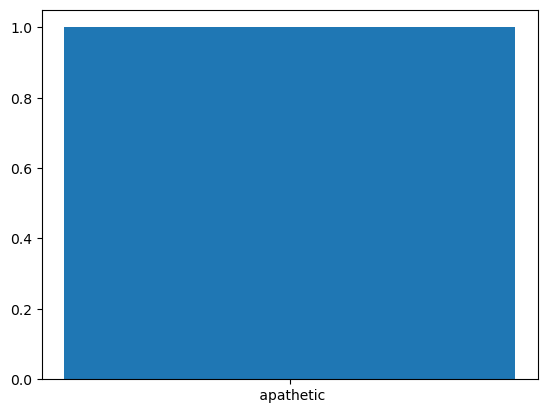

In [12]:
fig,ax1 = plt.subplots()
ax1.bar(w.keys(),w.values())
plt.show()

In [13]:
import nltk
nltk.download ('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kaustavsharma/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [1]:
def sentiment_analyze(senti_text):
    score = SentimentIntensityAnalyzer().polarity_scores(clean_text)
    neg = score['neg']
    pos = score['pos']
    
    print (score)
    if pos>neg:
        print ("Happy ")
    elif pos <neg:
        print ("Sad ")
    else:
        print ("Normal ")
sentiment_analyze(final_words)

NameError: name 'final_words' is not defined

In [ ]:
y =  df ['']